In [20]:
import pandas as pd

In [21]:
df=pd.read_csv('/content/Dataset .csv')

In [22]:
cuisine_counts=df['Cuisines'].value_counts()
total_restaurant=len(df)
top_cuisines=cuisine_counts.nlargest(3)
for i,j in top_cuisines.items():
  percentage=(j/total_restaurant)*100
  print(f'{i}:{percentage:.2f}%')

North Indian:9.80%
North Indian, Chinese:5.35%
Chinese:3.71%


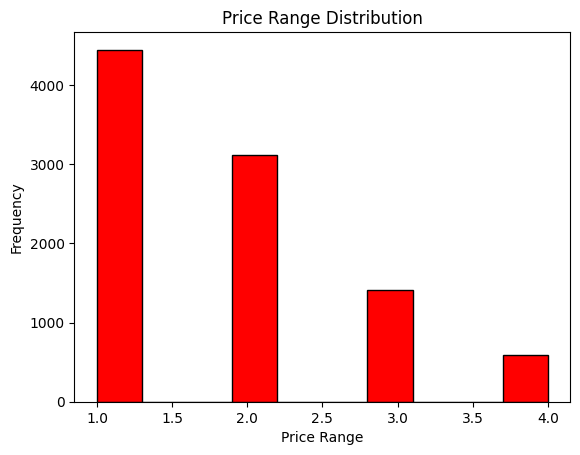

In [23]:
import matplotlib.pyplot as plt
plt.hist(df['Price_range'], bins=10, edgecolor='black',color="Red")
plt.title('Price Range Distribution')
plt.xlabel('Price Range')
plt.ylabel('Frequency')
plt.show()


In [24]:
online_delivery_count = df['Has_Online_delivery'].sum()


In [25]:
df.columns

Index(['R_ID', 'Restaurant_Name', 'Country_Code', 'City', 'Address',
       'Locality', 'Locality_Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average_Cost_for_two', 'Currency', 'Has_Table_booking',
       'Has_Online_delivery', 'Is_delivering_now', 'Switch_to_order_menu',
       'Price_range', 'Aggregate_rating', 'Rating_color', 'Rating_text',
       'Votes'],
      dtype='object')

In [26]:
#Analyze the distribution of aggregate ratings and determine the most common rating range
rating_distribution = df['Aggregate_rating'].value_counts()
rating_distribution

,count
Aggregate_rating,
0.0,2148
3.2,522
3.1,519
3.4,498
3.3,483
3.5,480
3.0,468
3.6,458
3.7,427


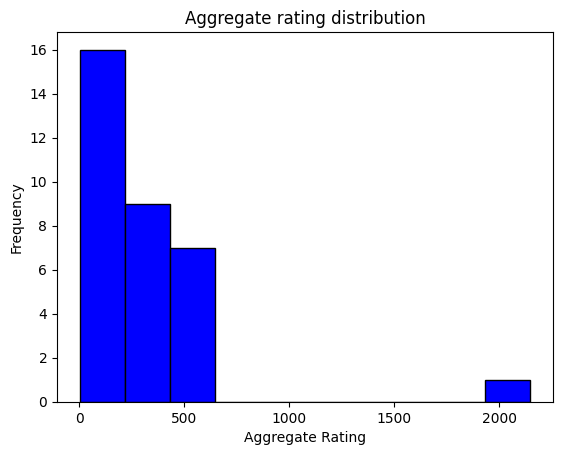

In [27]:
most_common_rating = df['Aggregate_rating']
plt.hist(df['Aggregate_rating'].value_counts() , edgecolor='black',color='Blue')
plt.xlabel('Aggregate Rating')
plt.ylabel('Frequency')
plt.title('Aggregate rating distribution')
plt.show()



In [28]:
most_common_rating

,Aggregate_rating
0,4.8
1,4.5
2,4.4
3,4.9
4,4.8
...,...
9546,4.1
9547,4.2
9548,3.7
9549,4.0


In [29]:
rating_counts = df['Aggregate_rating'].value_counts()
most_common_ratings = rating_counts[rating_counts == rating_counts.max()].index
print(most_common_ratings)


Index([0.0], dtype='float64', name='Aggregate_rating')


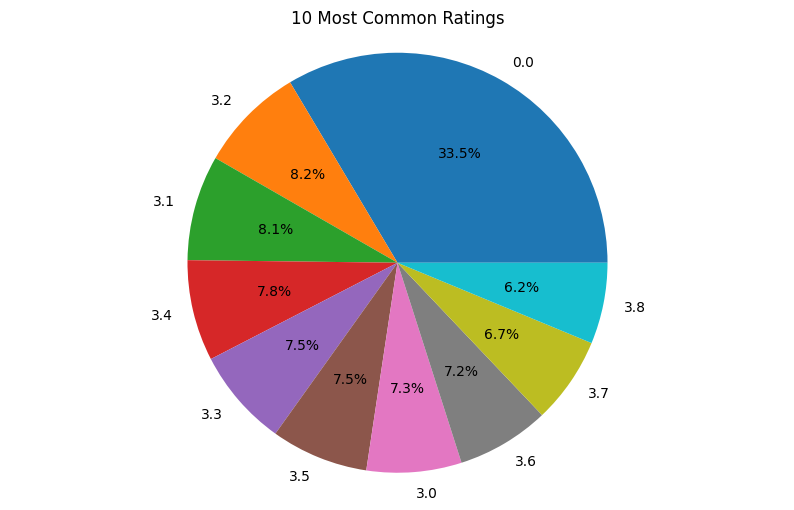

In [30]:
import matplotlib.pyplot as plt

rating_counts = df['Aggregate_rating'].value_counts()
most_common_ratings = rating_counts.nlargest(10)  # 10 most common ratings

plt.figure(figsize=(10, 6))
plt.pie(most_common_ratings.values, labels=most_common_ratings.index, autopct='%1.1f%%')
plt.axis('equal')
plt.title('10 Most Common Ratings')
plt.show()


In [31]:
#  Calculate the average number of votes received by restaurants
average_votes = df['Votes'].mean()
average_votes

156.909747670401

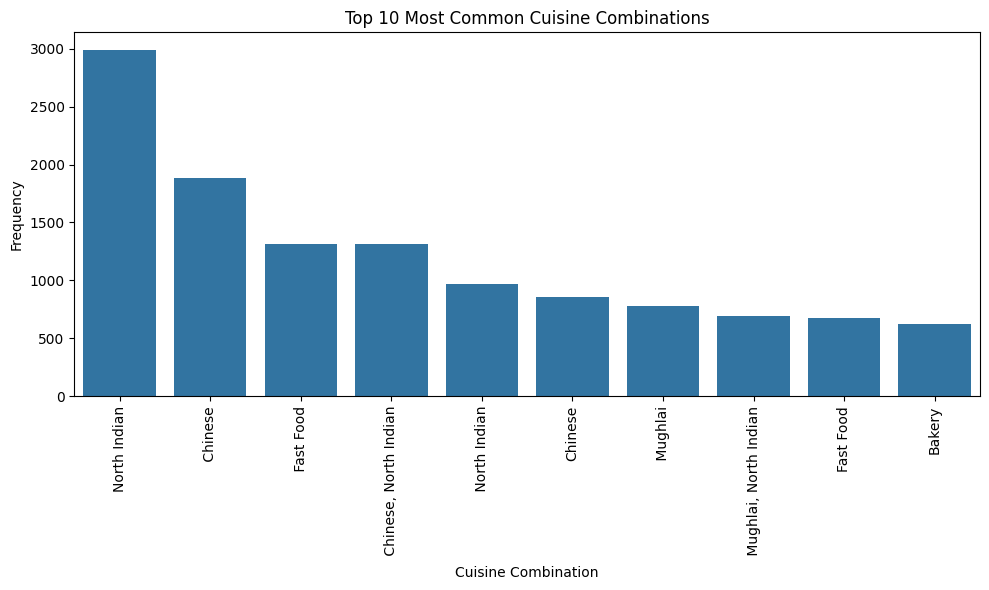

In [32]:
# Identify the most common combinations of cuisines in the dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations

# Load the dataset


# Split the cuisines column into a list of cuisines
df['cuisines'] = df['Cuisines'].astype(str).apply(lambda x: x.split(','))



# Generate all possible combinations of cuisines
all_combinations = []
for index, row in df.iterrows():
    for r in range(1, len(row['cuisines']) + 1):
        combinations_object = combinations(row['cuisines'], r)
        combinations_list = list(combinations_object)
        for combination in combinations_list:
            all_combinations.append(combination)

# Count the frequency of each combination
combination_counts = {}
for combination in all_combinations:
    combination = tuple(sorted(combination))
    if combination in combination_counts:
        combination_counts[combination] += 1
    else:
        combination_counts[combination] = 1

# Find the top 10 most common combinations
top_combinations = sorted(combination_counts.items(), key=lambda x: x[1], reverse=True)[:10]

# Create a bar chart to visualize the top combinations
combination_labels = [', '.join(combination[0]) for combination in top_combinations]
combination_frequencies = [combination[1] for combination in top_combinations]

plt.figure(figsize=(10, 6))
sns.barplot(x=combination_labels, y=combination_frequencies)
plt.xlabel('Cuisine Combination')
plt.ylabel('Frequency')
plt.title('Top 10 Most Common Cuisine Combinations')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()




In [33]:
df['Cuisines']

,Cuisines
0,"French, Japanese, Desserts"
1,Japanese
2,"Seafood, Asian, Filipino, Indian"
3,"Japanese, Sushi"
4,"Japanese, Korean"
...,...
9546,Turkish
9547,"World Cuisine, Patisserie, Cafe"
9548,"Italian, World Cuisine"
9549,Restaurant Cafe


In [34]:
import pandas as pd
import plotly.express as px



df['cuisines'] = df['cuisines'].astype(str).apply(lambda x: x.split(', '))

cuisine_combinations = []
for index, row in df.iterrows():
    for r in range(1, len(row['cuisines']) + 1):
        combinations_object = combinations(row['cuisines'], r)
        combinations_list = list(combinations_object)
        for combination in combinations_list:
            cuisine_combinations.append({
                'combination': ', '.join(combination),
                'rating': row['Aggregate_rating']
            })

cuisine_combinations_df = pd.DataFrame(cuisine_combinations)

average_ratings = cuisine_combinations_df.groupby('combination')['rating'].mean().reset_index()


fig = px.bar(average_ratings.sort_values('rating', ascending=False).head(10), x='combination', y='rating', title='क्यूजीन संयोजनों की औसत रेटिंग')
fig.show()


In [35]:
df.columns

Index(['R_ID', 'Restaurant_Name', 'Country_Code', 'City', 'Address',
       'Locality', 'Locality_Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average_Cost_for_two', 'Currency', 'Has_Table_booking',
       'Has_Online_delivery', 'Is_delivering_now', 'Switch_to_order_menu',
       'Price_range', 'Aggregate_rating', 'Rating_color', 'Rating_text',
       'Votes', 'cuisines'],
      dtype='object')

In [36]:
df

,R_ID,Restaurant_Name,Country_Code,City,Address,Locality,Locality_Verbose,Longitude,Latitude,Cuisines,...,Has_Table_booking,Has_Online_delivery,Is_delivering_now,Switch_to_order_menu,Price_range,Aggregate_rating,Rating_color,Rating_text,Votes,cuisines
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,"[['French', ' Japanese', ' Desserts']]"
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,[['Japanese']]
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,"[['Seafood', ' Asian', ' Filipino', ' Indian']]"
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,"[['Japanese', ' Sushi']]"
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,"[['Japanese', ' Korean']]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,No,No,No,No,3,4.1,Green,Very Good,788,[['Turkish']]
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,No,No,No,No,3,4.2,Green,Very Good,1034,"[['World Cuisine', ' Patisserie', ' Cafe']]"
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,No,No,No,No,4,3.7,Yellow,Good,661,"[['Italian', ' World Cuisine']]"
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,No,No,No,No,4,4.0,Green,Very Good,901,[['Restaurant Cafe']]


In [37]:
# Determine if certain cuisine combinations tend to have higher ratings.
# Explode the 'cuisines' column to have individual rows for each cuisine
df_exploded = df.explode('cuisines')

# Strip leading/trailing spaces from cuisine names
df_exploded['cuisines'] = df_exploded['cuisines'].str.strip()

# Calculate the average rating for each cuisine
cuisine_rating_correlation = df_exploded.groupby('cuisines')['Aggregate_rating'].mean()

# Display the correlation
print(cuisine_rating_correlation)

cuisines
' Afghani'           4.066667
' Afghani']          3.125000
' African'           3.900000
' African']          2.875000
' American'          3.928571
                       ...   
['Vietnamese']       4.050000
['Western'           3.700000
['World Cuisine'     4.300000
['World Cuisine']    4.900000
['nan']              3.866667
Name: Aggregate_rating, Length: 430, dtype: float64


In [38]:

from itertools import combinations



df['cuisines'] = df['Cuisines'].astype(str).apply(lambda x: x.split(', '))

cuisine_combinations = []
for index, row in df.iterrows():
    for r in range(1, len(row['cuisines']) + 1):
        combinations_object = combinations(row['cuisines'], r) # Now 'combinations' is defined
        combinations_list = list(combinations_object)
        for combination in combinations_list:
            cuisine_combinations.append({
                'combination': ', '.join(combination),
                'rating': row['Aggregate_rating']
            })


cuisine_combinations_df = pd.DataFrame(cuisine_combinations)

average_ratings = cuisine_combinations_df.groupby('combination')['rating'].mean().reset_index()


high_rating_combinations = average_ratings[average_ratings['rating'] > average_ratings['rating'].mean()]

print(high_rating_combinations)

                          combination    rating
3                      Afghani, Curry  3.900000
4                 Afghani, Hyderabadi  4.000000
5                     Afghani, Indian  4.000000
6         Afghani, Indian, Hyderabadi  4.000000
16                  African, Lebanese  4.000000
...                               ...       ...
9045           World Cuisine, Mexican  4.400000
9046  World Cuisine, Mexican, Italian  4.400000
9047        World Cuisine, Patisserie  4.200000
9048  World Cuisine, Patisserie, Cafe  4.200000
9049                              nan  3.866667

[5604 rows x 2 columns]


In [40]:
import pandas as pd
from itertools import combinations
import plotly.express as px  # Import plotly.express for visualization

# Load the dataframe (assuming you've already loaded it as 'df')
# df = pd.read_csv('your_dataset.csv')

# Split cuisines into a list
df['cuisines'] = df['Cuisines'].astype(str).apply(lambda x: x.split(', '))

# Create a list of cuisine combinations and their ratings
cuisine_combinations = []
for index, row in df.iterrows():
    for r in range(1, len(row['cuisines']) + 1):
        combinations_object = combinations(row['cuisines'], r)
        combinations_list = list(combinations_object)
        for combination in combinations_list:
            cuisine_combinations.append({
                'combination': ', '.join(combination),
                'rating': row['Aggregate_rating']  # Use 'Aggregate_rating' column
            })

# Create a DataFrame from the cuisine combinations
cuisine_combinations_df = pd.DataFrame(cuisine_combinations)

# Calculate average ratings for each combination
average_ratings = cuisine_combinations_df.groupby('combination')['rating'].mean().reset_index()

# Find high-rating combinations (above average)
high_rating_combinations = average_ratings[average_ratings['rating'] > average_ratings['rating'].mean()]

# Create a bar plot using plotly.express
fig = px.bar(
    high_rating_combinations.sort_values('rating', ascending=False).head(10),  # Top 10
    x='combination',
    y='rating',
    title='High-Rating Cuisine Combinations (Above Average)'
)
fig.show()

print(high_rating_combinations)

                          combination    rating
3                      Afghani, Curry  3.900000
4                 Afghani, Hyderabadi  4.000000
5                     Afghani, Indian  4.000000
6         Afghani, Indian, Hyderabadi  4.000000
16                  African, Lebanese  4.000000
...                               ...       ...
9045           World Cuisine, Mexican  4.400000
9046  World Cuisine, Mexican, Italian  4.400000
9047        World Cuisine, Patisserie  4.200000
9048  World Cuisine, Patisserie, Cafe  4.200000
9049                              nan  3.866667

[5604 rows x 2 columns]


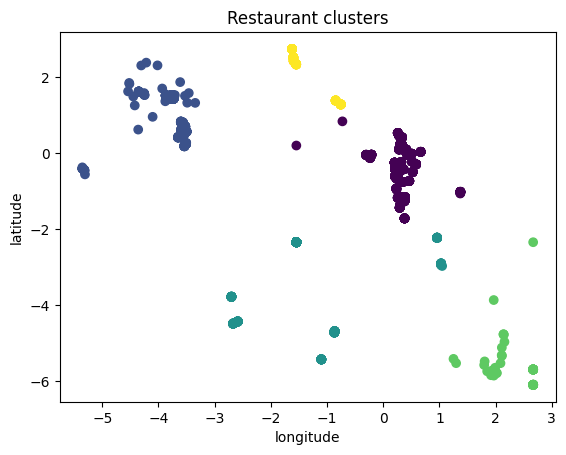

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler




scaler = StandardScaler()
df[['Latitude', 'Longitude']] = scaler.fit_transform(df[['Latitude', 'Longitude']])


kmeans = KMeans(n_clusters=5)
kmeans.fit(df[['Latitude', 'Longitude']])


df['cluster'] = kmeans.labels_


plt.scatter(df['Longitude'], df['Latitude'], c=df['cluster'])
plt.title('Restaurant clusters')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.show()


In [42]:

scaler = StandardScaler()

df[['Latitude', 'Longitude']] = scaler.fit_transform(df[['Latitude', 'Longitude']])

kmeans = KMeans(n_clusters=5)
kmeans.fit(df[['Latitude', 'Longitude']])



KMeans(n_clusters=5)

In [43]:

import pandas as pd



# Convert restaurant names to lowercase
df['name'] = df['Restaurant_Name'].str.lower()

# Clean restaurant names (remove special characters)
df['name'] = df['name'].str.replace('[^a-zA-Z0-9\s]', '')

# Identify restaurant chains
chains = df['name'].value_counts()[df['name'].value_counts() > 1].index

# Print restaurant chains
print("Restaurant Chains:")
for chain in chains:
    print(chain)

# Print the number of restaurant chains
print("\nNumber of Restaurant Chains:", len(chains))


Restaurant Chains:
cafe coffee day
domino's pizza
subway
green chick chop
mcdonald's
keventers
pizza hut
giani
baskin robbins
barbeque nation
barista
giani's
dunkin' donuts
pind balluchi
costa coffee
pizza hut delivery
sagar ratna
wah ji wah
twenty four seven
kfc
republic of chicken
starbucks
chaayos
haldiram's
burger king
shree rathnam
bikanervala
aggarwal sweets
moti mahal delux
frontier
behrouz biryani
karim's
bikaner sweets
34, chowringhee lane
apni rasoi
chicago pizza
madras cafe
burger point
wow! momo
gopala
berco's
yo! china
sardar a pure meat shop
shama chicken corner
nirula's ice cream
cocoberry
punjabi tadka
chowringhee
punjabi chaap corner
angels in my kitchen
faasos
kebab xpress
ovenstory pizza
slice of italy
china town
dolce gelato
tibb's frankie
rollsking
mocha
btw
tpot
khan chacha
nazeer foods
the yellow chilli
chawla's�_
chinese hut
sanjha chulha
goli vada pav no. 1
al bake
cafe coffee day - the lounge
mr. sub
the diet kitchen
biryani blues
farzi cafe
bikaner sweets & r

In [44]:
#  Analyze the ratings and popularity of different restaurant chains
import pandas as pd

# Convert restaurant names to lowercase
df['name'] = df['Restaurant_Name'].str.lower()

# Clean restaurant names (remove special characters)
df['name'] = df['name'].str.replace('[^a-zA-Z0-9\s]', '', regex=True)

# Identify restaurant chains (restaurants appearing more than once)
chains = df['name'].value_counts()[df['name'].value_counts() > 1].index

# Create a DataFrame containing only restaurant chains
chain_df = df[df['name'].isin(chains)]

In [45]:
# Calculate average rating for each chain
chain_ratings = chain_df.groupby('name')['Aggregate_rating'].mean()

# Calculate the number of outlets for each chain (popularity indicator)
chain_popularity = chain_df['name'].value_counts()

# Combine ratings and popularity into a single DataFrame
chain_analysis = pd.DataFrame({'Average Rating': chain_ratings, 'Number of Outlets': chain_popularity})

# Sort by average rating in descending order
chain_analysis = chain_analysis.sort_values('Average Rating', ascending=False)

# Display the analysis
print(chain_analysis)

                           Average Rating  Number of Outlets
name                                                        
talaga sampireun                    4.900                  3
silantro filmex                     4.850                  2
abs absolute barbecues              4.850                  2
abs  absolute barbecues             4.825                  4
naturals ice cream                  4.800                  2
...                                   ...                ...
ocd  online cake delivery           0.000                  2
meatwalecom                         0.000                  4
the big scoop                       0.000                  2
kettle  kegs                        0.000                  5
da pizza zone                       0.000                  2

[747 rows x 2 columns]


In [47]:
import plotly.express as px

# Create a bar plot of average ratings
fig=plt.figure(figsize=(12,6))
fig = px.bar(chain_analysis, x=chain_analysis.index, y='Average Rating',
             title='Average Ratings of Restaurant Chains',
             labels={'x': 'Restaurant Chain', 'y': 'Average Rating'})
fig.update_layout(xaxis_tickangle=-45)  # Rotate x-axis labels
fig.show()

# Create a scatter plot of average rating vs. number of outlets
fig = px.scatter(chain_analysis, x='Number of Outlets', y='Average Rating',
                 title='Average Rating vs. Number of Outlets for Restaurant Chains',
                 labels={'x': 'Number of Outlets', 'y': 'Average Rating'},
                 hover_data=['Average Rating', 'Number of Outlets'])  # Show data on hover
fig.show()

<Figure size 1200x600 with 0 Axes>

In [48]:
positive_keywords = ['Good', 'Very Good', 'Excellent',
                    ]

negative_keywords = ['Average',
                     'poor']

In [49]:
df["Rating_text"].value_counts()

,count
Rating_text,
Average,3737
Not rated,2148
Good,2100
Very Good,1079
Excellent,301
Poor,186


In [50]:
positive_counts = {}
negative_counts = {}

for review in df['Rating_text']:  # Assuming 'Reviews' column contains the reviews
    review_lower = review.lower()  # Convert review to lowercase for case-insensitive matching
    for keyword in positive_keywords:
        if keyword in review_lower:
            positive_counts[keyword] = positive_counts.get(keyword, 0) + 1
    for keyword in negative_keywords:
        if keyword in review_lower:
            negative_counts[keyword] = negative_counts.get(keyword, 0) + 1

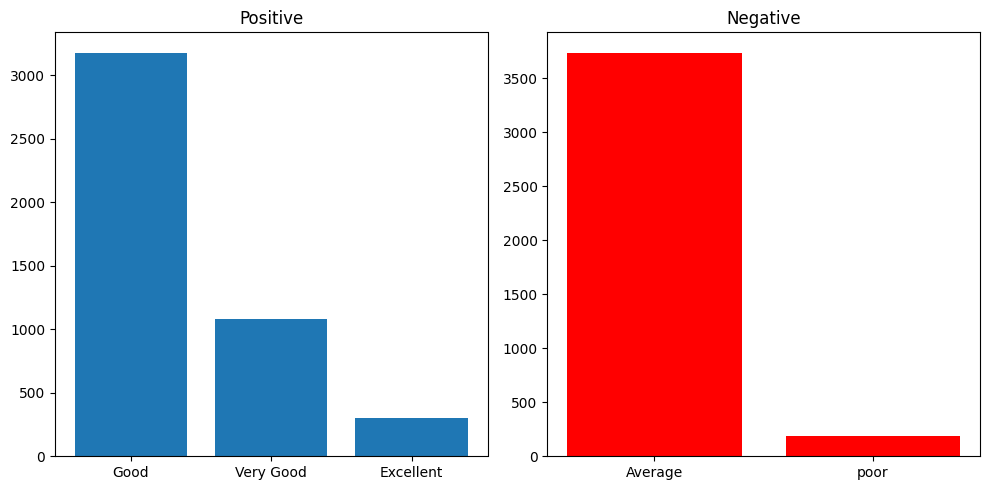

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

positive_keywords = ['Good', 'Very Good', 'Excellent']

negative_keywords = ['Average', 'poor']

def count_keywords(keywords, reviews):
    counts = {}
    for review in reviews:
        for keyword in keywords:
            # Make the keyword search case-insensitive
            if keyword.lower() in review.lower():
                counts[keyword] = counts.get(keyword, 0) + 1
    return counts

positive_counts = count_keywords(positive_keywords, df['Rating_text'])
negative_counts = count_keywords(negative_keywords, df['Rating_text'])

# Check if positive_counts and negative_counts are not empty before proceeding
if positive_counts and negative_counts:
    top_positive = sorted(positive_counts.items(), key=lambda item: item[1], reverse=True)[:5]
    top_negative = sorted(negative_counts.items(), key=lambda item: item[1], reverse=True)[:5]

    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    # Extract x and height values from top_positive
    x_positive, height_positive = zip(*top_positive)
    plt.bar(x_positive, height_positive)
    plt.title('Positive')

    plt.subplot(1, 2, 2)
    # Extract x and height values from top_negative
    x_negative, height_negative = zip(*top_negative)
    plt.bar(x_negative, height_negative, color='red')
    plt.title('Negative')

    plt.tight_layout()
    plt.show()
else:
    print("No matching keywords found in reviews.")

In [55]:
df['review_length'] = df['Rating_text'].apply(len)
average_review_length = df['review_length'].mean()
print(f"Average Review Length: {average_review_length}")

Average Review Length: 7.020730813527379


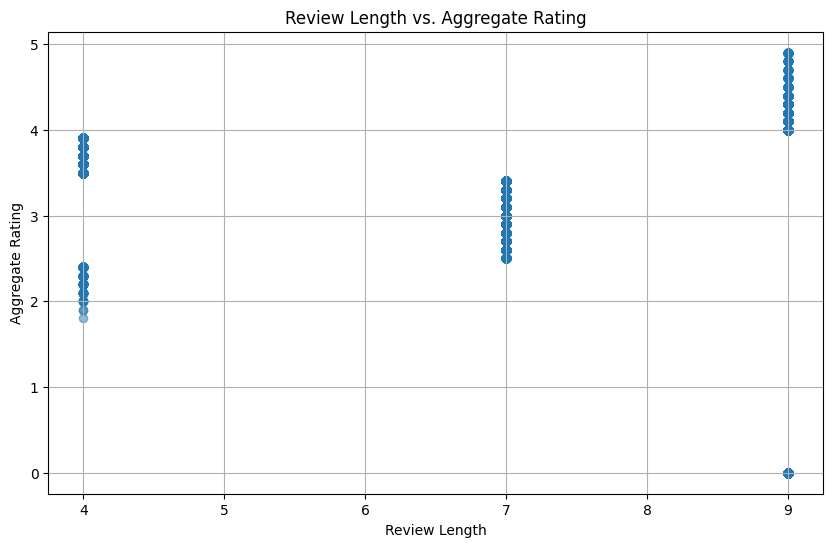

Correlation between Review Length and Aggregate Rating: -0.4788848381349333


In [56]:
import matplotlib.pyplot as plt

# Scatter plot to visualize the relationship
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.scatter(df['review_length'], df['Aggregate_rating'], alpha=0.5)  # Alpha for transparency
plt.xlabel('Review Length')
plt.ylabel('Aggregate Rating')
plt.title('Review Length vs. Aggregate Rating')
plt.grid(True)
plt.show()

# Calculate correlation
correlation = df['review_length'].corr(df['Aggregate_rating'])
print(f"Correlation between Review Length and Aggregate Rating: {correlation}")

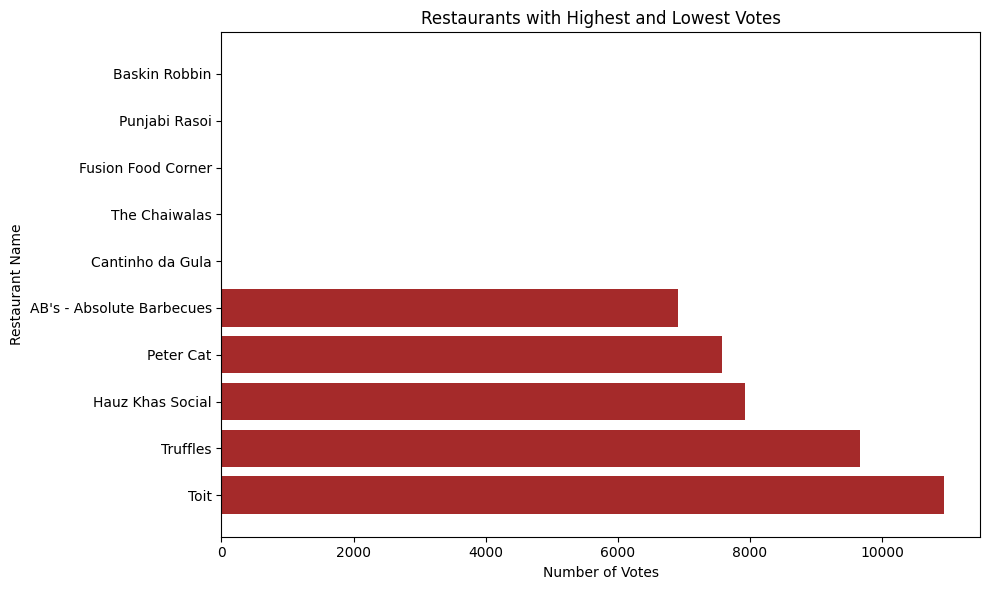

In [57]:
import matplotlib.pyplot as plt

# Get the top 5 and bottom 5 restaurants by votes
top_5_restaurants = df.nlargest(5, 'Votes')[['Restaurant_Name', 'Votes']]
bottom_5_restaurants = df.nsmallest(5, 'Votes')[['Restaurant_Name', 'Votes']]

# Combine the dataframes
combined_restaurants = pd.concat([top_5_restaurants, bottom_5_restaurants])

# Create the horizontal bar chart
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.barh(combined_restaurants['Restaurant_Name'], combined_restaurants['Votes'], color=['brown'] * 5 + ['red'] * 5)  # Green for top 5, red for bottom 5
plt.xlabel('Number of Votes')
plt.ylabel('Restaurant Name')
plt.title('Restaurants with Highest and Lowest Votes')
plt.tight_layout()
plt.show()

In [58]:
# Find the restaurant with the highest number of votes
max_votes_index = df['Votes'].idxmax()
restaurant_with_max_votes = df.loc[max_votes_index, 'Restaurant_Name']
print(f"Restaurant with the highest number of votes: {restaurant_with_max_votes}")

# Find the restaurant with the lowest number of votes
min_votes_index = df['Votes'].idxmin()
restaurant_with_min_votes = df.loc[min_votes_index, 'Restaurant_Name']
print(f"Restaurant with the lowest number of votes: {restaurant_with_min_votes}")

Restaurant with the highest number of votes: Toit
Restaurant with the lowest number of votes: Cantinho da Gula


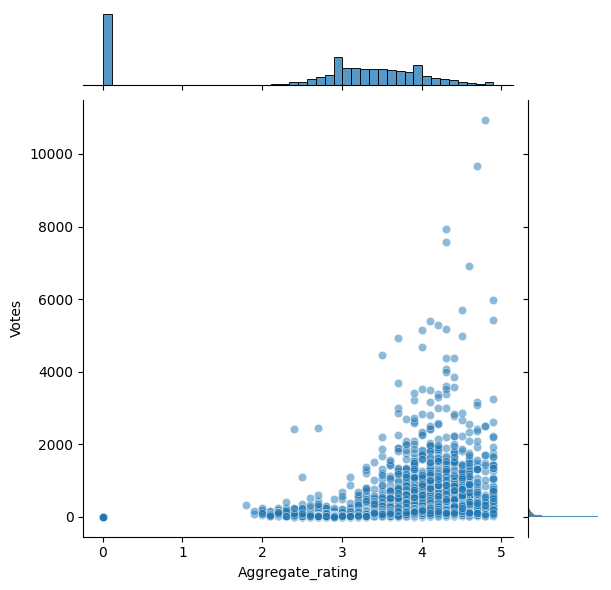

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a jointplot with scatter and histograms
sns.jointplot(x='Aggregate_rating', y='Votes', data=df, kind='scatter', alpha=0.5)
plt.show()

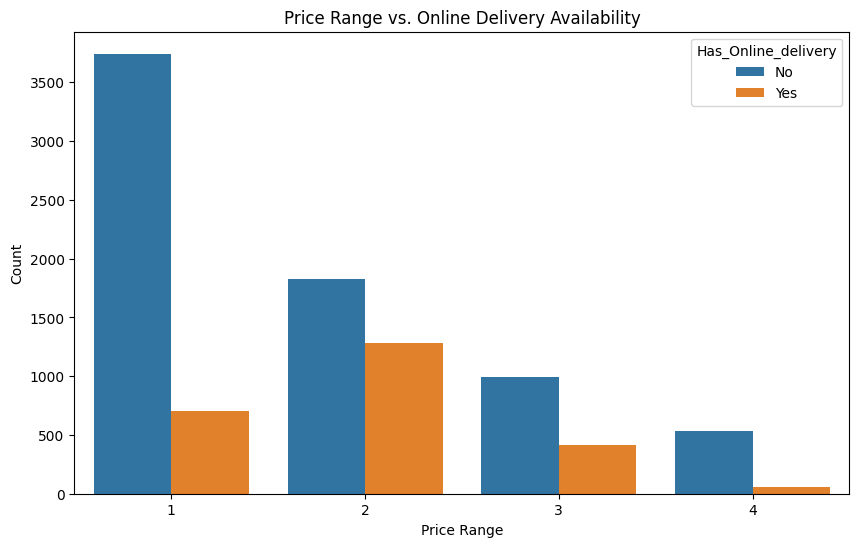

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a countplot to visualize the relationship
plt.figure(figsize=(10, 6))
sns.countplot(x='Price_range', hue='Has_Online_delivery', data=df)
plt.title('Price Range vs. Online Delivery Availability')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.show()



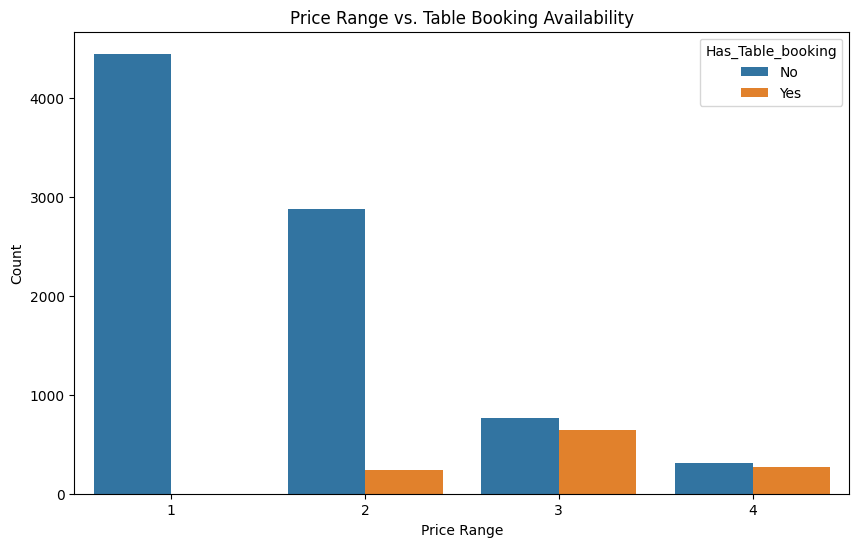

In [61]:
# Assuming 'Table_Booking_Column' represents table booking availability (replace with actual column name)
plt.figure(figsize=(10, 6))
sns.countplot(x='Price_range', hue='Has_Table_booking', data=df)
plt.title('Price Range vs. Table Booking Availability')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.show()



In [63]:
df.columns

Index(['R_ID', 'Restaurant_Name', 'Country_Code', 'City', 'Address',
       'Locality', 'Locality_Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average_Cost_for_two', 'Currency', 'Has_Table_booking',
       'Has_Online_delivery', 'Is_delivering_now', 'Switch_to_order_menu',
       'Price_range', 'Aggregate_rating', 'Rating_color', 'Rating_text',
       'Votes', 'cuisines', 'cluster', 'name', 'review_length'],
      dtype='object')

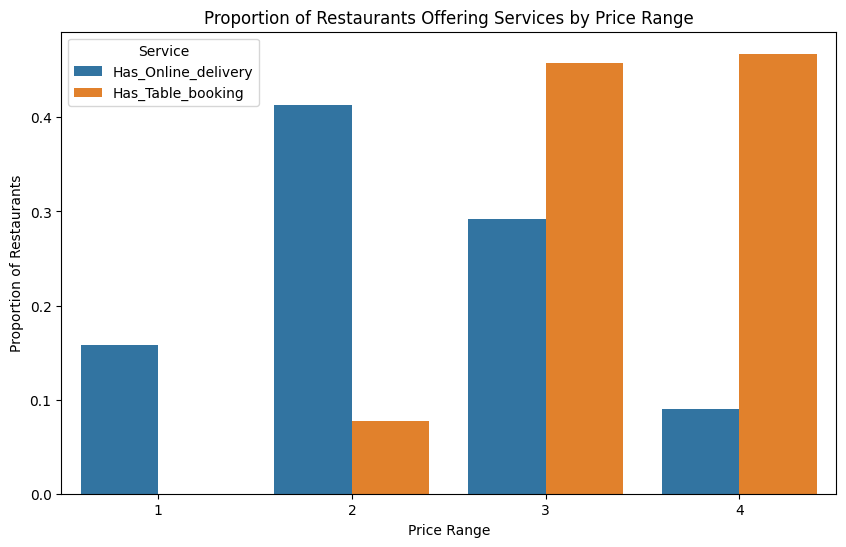

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'Has_Table_booking' is the column for table booking
services = ['Has_Online_delivery', 'Has_Table_booking']
price_ranges = df['Price_range'].unique()

service_proportions = []
for service in services:
    for price_range in price_ranges:
        # Convert 'Yes'/'No' to 1/0 before calculating the mean
        proportion = df[df['Price_range'] == price_range][service].map({'Yes': 1, 'No': 0}).mean()
        service_proportions.append([service, price_range, proportion])

service_df = pd.DataFrame(service_proportions, columns=['Service', 'Price Range', 'Proportion'])

plt.figure(figsize=(10, 6))
sns.barplot(x='Price Range', y='Proportion', hue='Service', data=service_df)
plt.title('Proportion of Restaurants Offering Services by Price Range')
plt.ylabel('Proportion of Restaurants')
plt.show()